In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic #model holistic
mp_drawing=mp.solutions.drawing_utils #vẽ các utilities

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #chuyển màu sắc TỪ BGR TO RGB
    image.flags.writeable=False
    result=model.process(image) #model xử lý + xác định
    image.flags.writeable=True
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #CHUYỂN NGƯỢC LẠI
    return image,result

In [4]:
def draw_landmark(image,result):
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)


In [5]:
def draw_styled_landmark(image,result):
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=3))
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,
                          
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=3))

In [6]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #đọc phản hồi từ camera
        ret,frame=cap.read()

        
    # xác định hình ảnh
        image,result=mediapipe_detection(frame,holistic)
        print(result)
        draw_styled_landmark(image,result)
        #show to screen
        cv2.imshow(' head feed',image)
        #break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmark(frame,result)

# 1. Extract giá trị sử dụng 

In [8]:
def extract_result(result):
    if  result.left_hand_landmarks:
    # Trích xuất tọa độ x, y, z từ result.left_hand_landmarks
        lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten()
        # flatten flatten() để biến mảng 2D này thành một mảng 1D.
    else:
        # Nếu result hoặc result.left_hand_landmarks không có giá trị, trả về mảng chứa 0
        lh = np.zeros(21 * 3)
    if  result.right_hand_landmarks:
        # Trích xuất tọa độ x, y, z từ result.left_hand_landmarks

        rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten()
    else:
        # Nếu result hoặc result.left_hand_landmarks không có giá trị, trả về mảng chứa 0
        rh = np.zeros(21 * 3)
    return np.concatenate([lh,rh])


In [9]:
extract_result(result).shape

(126,)

# * Set up folder  Data Collectiion

In [10]:

DATA_PATH=os.path.join("datacopy")
# nhãn cho từng hành động để lấy con chữ
actions = [folder for folder in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, folder))]
# actions = np.array(['have a nice day', 'read'])
# actions = np.array(['A', 'B', 'C','D'])
print(actions)
# 30 video có giá trị dữ liệu
no_sequences=30
#video có chiều dài 30 frame
sequences_len=30



['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'have a nice day', 'read']


In [11]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
#thử nghiệm


# Thu thập dữ liệu cho training và testing

In [19]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #New loop
    # Giải thích: vòng lặp này sẽ lặp lại 30 lần (no_sequences = 30) để thu thập dữ liệu cho mỗi hành động.
    for action in actions:
       
        for sequence in range(no_sequences):
            for frame_num in range(sequences_len):

        
                #đọc phản hồi từ camera
                ret,frame=cap.read()
                # xác định hình ảnh
                image,result=mediapipe_detection(frame,holistic)
                # print(result)
                draw_styled_landmark(image,result)

                #LOGIC APPLY
                if frame_num ==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
    
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA) 
                    cv2.waitKey(2000)
                else :
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

                #Keypoints mới được xuất 
                keypoints=extract_result(result)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show to screen
                cv2.imshow(' head feed',image)
                #break
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [37]:
cap.release()
cv2.destroyAllWindows()

# Gắn nhãn dữ liệu


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [13]:
label_map={label:num for num,label in enumerate(actions)}
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'have a nice day': 8,
 'read': 9}

In [14]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range (sequences_len):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape
np.array(labels).shape
X=np.array(sequences)
X.shape

(300, 30, 126)

In [16]:
y=to_categorical(labels).astype(int)
print(y)


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)
x_train.shape

(285, 30, 126)

In [18]:
x_test.shape
y_train.shape

(285, 10)

# Xây dựng model huấn luyện LSTM Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Conv1D,MaxPooling1D, Conv2D,TimeDistributed,Flatten,Dropout
from tensorflow.keras.callbacks import TensorBoard
import os

In [20]:
log_dir=os.path.join("Logs")
tb_callback=TensorBoard(log_dir=log_dir)



In [21]:
actions = np.array(actions)
actions.shape[0]

10

In [26]:

del model
model=Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 126))) #Giải thích : 30 frame, 126 keypoints
model.add(MaxPooling1D(pool_size=2))# Giải thích: 30 frame, 126 keypoints


model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,126)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

# actions = np.array(actions)

# model=Sequential()
# # Add convolutional layers for image frames
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 258)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(TimeDistributed(Flatten()))

# # Add LSTM layers
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))

# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# model.add(Dense(actions.shape[0],activation='softmax'))


In [27]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [28]:
# history=model.fit(x_train,y_train,epochs=200,callbacks=[tb_callback])
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test),  verbose=2)

Epoch 1/200
9/9 - 4s - loss: 2.3002 - categorical_accuracy: 0.0912 - val_loss: 2.2835 - val_categorical_accuracy: 0.2667 - 4s/epoch - 421ms/step
Epoch 2/200
9/9 - 0s - loss: 2.2444 - categorical_accuracy: 0.1509 - val_loss: 2.0193 - val_categorical_accuracy: 0.1333 - 221ms/epoch - 25ms/step
Epoch 3/200
9/9 - 0s - loss: 2.0294 - categorical_accuracy: 0.2246 - val_loss: 1.9310 - val_categorical_accuracy: 0.3333 - 161ms/epoch - 18ms/step
Epoch 4/200
9/9 - 0s - loss: 1.8658 - categorical_accuracy: 0.2877 - val_loss: 1.7537 - val_categorical_accuracy: 0.2000 - 165ms/epoch - 18ms/step
Epoch 5/200
9/9 - 0s - loss: 1.7471 - categorical_accuracy: 0.3193 - val_loss: 1.5600 - val_categorical_accuracy: 0.3333 - 172ms/epoch - 19ms/step
Epoch 6/200
9/9 - 0s - loss: 1.5825 - categorical_accuracy: 0.3895 - val_loss: 1.5097 - val_categorical_accuracy: 0.3333 - 163ms/epoch - 18ms/step
Epoch 7/200
9/9 - 0s - loss: 1.5265 - categorical_accuracy: 0.3965 - val_loss: 1.3590 - val_categorical_accuracy: 0.4000

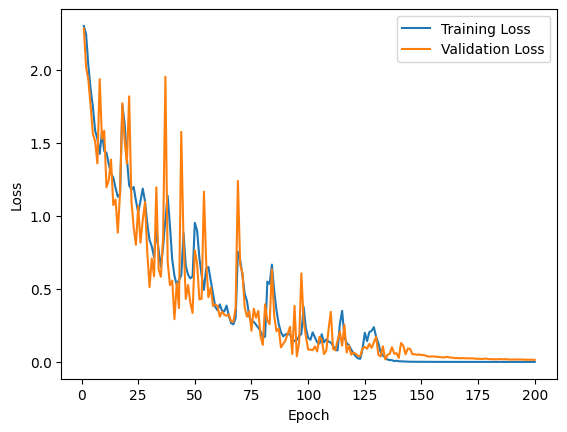

In [29]:
# Lấy thông tin về loss từ lịch sử
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ loss theo epoch
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 32)            12128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 14, 64)            24832     
                                                                 
 lstm_7 (LSTM)               (None, 14, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                      

# Lưu model

In [52]:
# model.save("actionv4_4_label_ABCDEFGH_haveaniceday_read.h5")

# Đánh giá mô hình

In [88]:
del model

In [92]:

model.load_weights("actionv4_4_label_ABCDEFGH_haveaniceday_read.h5")

In [93]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix

In [94]:
yhat=model.predict(x_train)

9/9 [==============================] - 1s 10ms/step


In [95]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()


In [96]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[257,   0],
        [  0,  28]],

       [[257,   0],
        [  0,  28]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  0,  29]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  0,  29]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  0,  29]],

       [[257,   0],
        [  0,  28]],

       [[255,   0],
        [  0,  30]]], dtype=int64)

In [97]:
accuracy_score(ytrue,yhat)


1.0

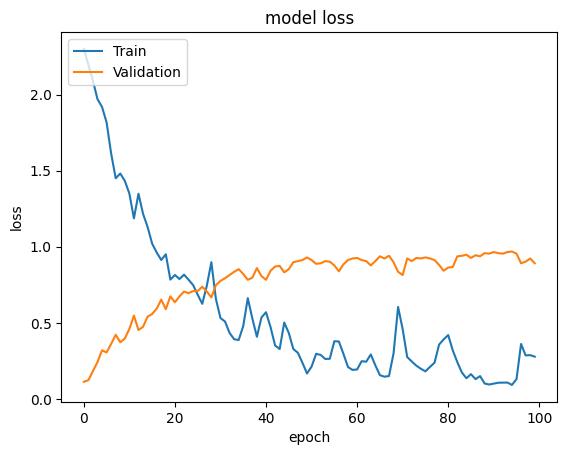

In [98]:
import matplotlib.pyplot as plt

# # summarize history for accuracy
# plt.plot(history.history['val_accuracy'])  
# plt.plot(history.history['categorical_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'accuracy'], loc='upper left')
plt.show()

# Test in Real time

In [99]:
import pyttsx3
engine = pyttsx3.init()
rate = engine.getProperty('rate')
engine.setProperty('rate', rate - 50)

In [100]:
colors=[(245,117,16),(117,245,16),(16,117,245),(16,245,235),(255, 0, 0), (0, 255, 0), (0, 0, 255), (128, 128, 0),(0, 0, 255), (128, 128, 0)]
def pro_viz(res,actions,input_frame,colors):
    output_frame=input_frame.copy()
    for num,prob in enumerate(res):
        if num < len(colors):
            cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
            cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

    return output_frame

In [30]:
print(actions)
# plt.imshow(pro_viz(res,actions,frame,colors))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'have a nice day' 'read']


In [102]:

#Các biến giá trị mới
sequence=[]
sentence=[]
threshold=0.8 #ngưỡng


cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #đọc phản hồi từ camera
        ret,frame=cap.read()

        
        # xác định hình ảnh
        image,result=mediapipe_detection(frame,holistic)
        print(result)
        # vẽ các landmark
        draw_styled_landmark(image,result)

        #2. LOGIC APPLY
        keypoints=extract_result(result)
        sequence.insert(0,keypoints)
        sequence=sequence[:30]
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
        #3. Vẽ các kết quả
        if res[np.argmax(res)]>threshold:
           
           
            print(res[np.argmax(res)])
            

            if len(sentence)>0:
                if actions[np.argmax(res)]!=sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                    # engine.say(actions[np.argmax(res)])
                    # engine.runAndWait()
            else: 
                print(np.argmax(res))
                print(actions[np.argmax(res)])                
                sentence.append(actions[np.argmax(res)])
                # engine.say(actions[np.argmax(res)])
                # engine.runAndWait()
        if len(sentence)>5:
            sentence=sentence[-5:]
        
        
        image=pro_viz(res,actions,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        #đọc chữ cái được nhận dạng
        
        
        #show to screen
        cv2.imshow(' head feed',image)
        #break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
1
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.SolutionOutputs'>
0.89736927
<class 'mediapipe.python.solution_base.Solut

In [108]:
#Các biến giá trị mới
sequence=[]
sentence=[]
threshold=0.8 #ngưỡng


cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #đọc phản hồi từ camera
        ret,frame=cap.read()

        
        # xác định hình ảnh
        image,result=mediapipe_detection(frame,holistic)
        print(result)
        # vẽ các landmark
        draw_styled_landmark(image,result)

        #2. LOGIC APPLY
        keypoints=extract_result(result)
        # sequence.insert(0,keypoints)
        # sequence=sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
        #3. Vẽ các kết quả
            if res[np.argmax(res)]>threshold:
                if len(sentence)>0:
                    if actions[np.argmax(res)]!=sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else: 
                    print(np.argmax(res))
                    print(actions[np.argmax(res)])                
                    sentence.append(actions[np.argmax(res)])
            if len(sentence)>5:
                sentence=sentence[-5:]
    
        
        image=pro_viz(res,actions,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        #đọc chữ cái được nhận dạng
        
        
        #show to screen
        cv2.imshow(' head feed',image)
        #break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [104]:
cap.release()
cv2.destroyAllWindows()

In [105]:
res[np.argmax(res)]>threshold

True

In [106]:
#read npy file
import numpy as np
y=np.load("data/B/1/9.npy")

# Kiểm tra số chiều của mảng
num_dimensions = y.ndim

if num_dimensions == 1:
    print("Mảng là 1D")
elif num_dimensions == 2:
    print("Mảng là 2D")
elif num_dimensions == 3:
    print("Mảng là 3D")
else:
    print("Mảng có số chiều khác 1D, 2D, hoặc 3D")


Mảng là 1D


In [107]:
print(len(actions)) 

10
